# LA Times Data:  exploratory data analysis

This notebook is used to examine COVID-19 data from the LA Times database

#### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily as ctx

#### Read in place data

In [4]:
la_tot = pd.read_csv('../datasets/la_times_data/latimes-place-totals.csv')
print(la_tot.shape)
la_tot.head(3)

(65516, 8)


,date,county,fips,place,confirmed_cases,note,x,y
0,2020-06-27,Contra Costa,13.0,Alamo,38,NaN,-122.032222,37.850278
1,2020-06-27,Contra Costa,13.0,Antioch,260,NaN,-121.805833,38.005000
2,2020-06-27,Contra Costa,13.0,Bay Point,128,NaN,-121.961667,38.029167


In [5]:
la_tot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65516 entries, 0 to 65515
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             65516 non-null  object 
 1   county           65516 non-null  object 
 2   fips             64911 non-null  float64
 3   place            65516 non-null  object 
 4   confirmed_cases  65516 non-null  int64  
 5   note             3421 non-null   object 
 6   x                64038 non-null  float64
 7   y                64038 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 4.0+ MB


#### Time distribution by place in LA county

In [6]:
la_tot['datestring'] = la_tot['date']
la_tot['date'] = pd.to_datetime(la_tot['date'])
la_county = la_tot[la_tot['county']=='Los Angeles']

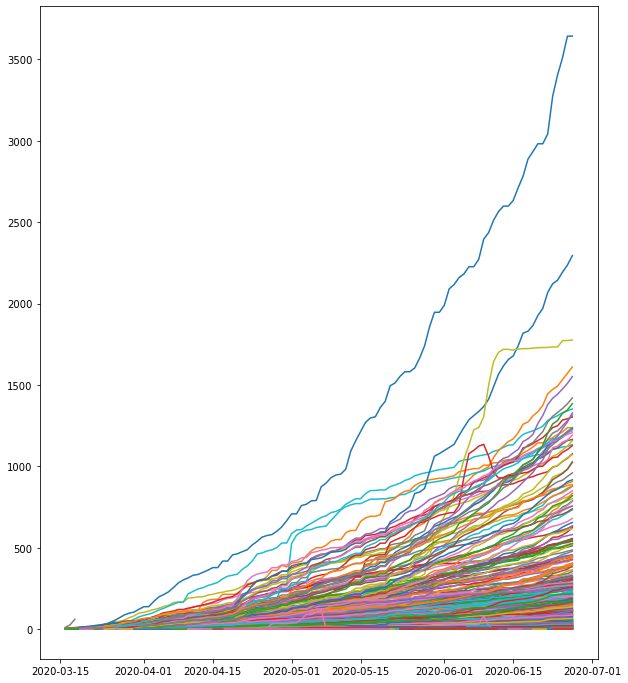

In [7]:
plt.figure(figsize=(10,12))

for place in la_county['place'].value_counts().index:
    record = la_county[la_county['place']==place]
    plt.plot(record['date'],record['confirmed_cases'])

#### Normalize to look at growth rates and timing

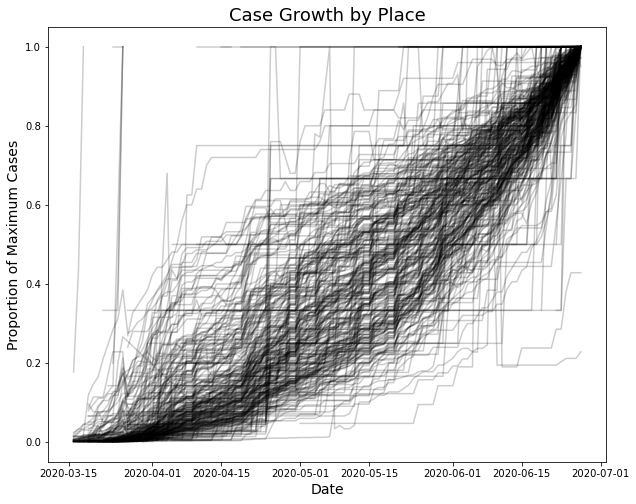

In [30]:
plt.figure(figsize=(10,8))
plt.xlabel('Date',fontsize=14)
plt.ylabel('Proportion of Maximum Cases',fontsize=14)
plt.title('Case Growth by Place',fontsize=18)

for place in la_county['place'].value_counts().index:
    record = la_county[la_county['place']==place]
    plt.plot(record['date'],record['confirmed_cases']/max(record['confirmed_cases']),'k-',alpha=0.2)
#plt.savefig('../images/la_county_case_growth.png',dpi=235,bbox_inches='tight');

#### Restrict to places with more than 250 total cases

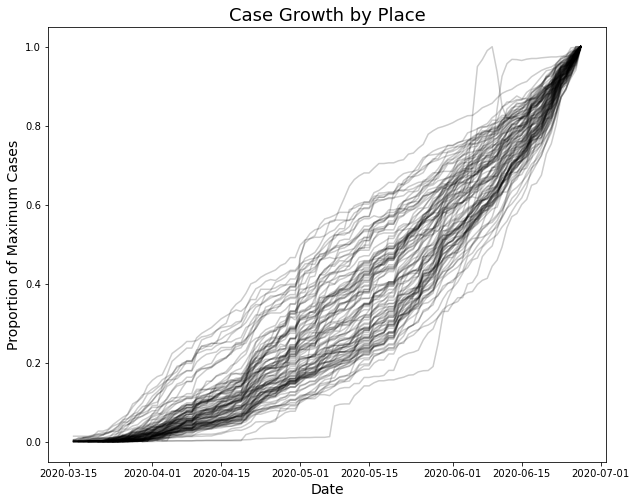

In [29]:
plt.figure(figsize=(10,8))
plt.xlabel('Date',fontsize=14)
plt.ylabel('Proportion of Maximum Cases',fontsize=14)
plt.title('Case Growth by Place',fontsize=18)

for place in la_county['place'].value_counts().index:
    record = la_county[la_county['place']==place]
    
    if max(record['confirmed_cases'])>=250:
        plt.plot(record['date'],record['confirmed_cases']/max(record['confirmed_cases']),'k-',alpha=0.2)
#plt.savefig('../images/la_county_case_growth_250.png',dpi=235,bbox_inches='tight');

#### Location data

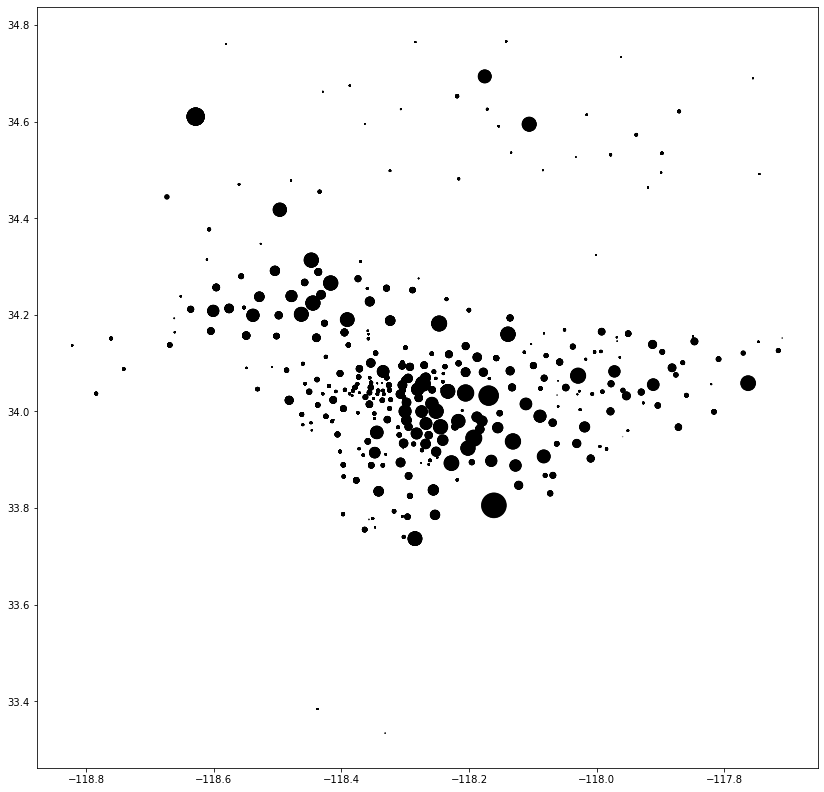

In [10]:
plt.figure(figsize=(14,14))
plt.scatter(la_county['x'],la_county['y'],c='k',alpha=0.5,s=la_county['confirmed_cases']/6)

#### Current Totals

In [16]:
current = la_county[la_county['date']=='2020-06-27'].sort_values('confirmed_cases',ascending=False)
print(current.shape)
current.head(10)

(323, 9)


,date,county,fips,place,confirmed_cases,note,x,y,datestring
249,2020-06-27,Los Angeles,37.0,Long Beach,3643,NaN,-118.161014,33.805559,2020-06-27
171,2020-06-27,Los Angeles,37.0,East Los Angeles,2295,NaN,-118.169189,34.032673,2020-06-27
141,2020-06-27,Los Angeles,37.0,Castaic,1777,NaN,-118.628355,34.610162,2020-06-27
130,2020-06-27,Los Angeles,37.0,Boyle Heights,1611,NaN,-118.205330,34.038150,2020-06-27
333,2020-06-27,Los Angeles,37.0,South Gate,1552,NaN,-118.192526,33.944713,2020-06-27
165,2020-06-27,Los Angeles,37.0,Downey,1421,NaN,-118.131148,33.937862,2020-06-27
177,2020-06-27,Los Angeles,37.0,El Monte,1386,NaN,-118.029074,34.073948,2020-06-27
191,2020-06-27,Los Angeles,37.0,Glendale,1353,NaN,-118.246803,34.181933,2020-06-27
293,2020-06-27,Los Angeles,37.0,Pomona,1329,NaN,-117.762596,34.058481,2020-06-27
152,2020-06-27,Los Angeles,37.0,Compton,1316,NaN,-118.227530,33.892938,2020-06-27


In [17]:
gdf = geopandas.read_file('../datasets/gis_data/la-county-neighborhoods-current/l.a. county neighborhood (current).shp')
gdf.rename(columns={'name':'place'},inplace=True)
gdf.head()

,slug,set,kind,external_i,place,display_na,sqmi,type,name_1,slug_1,geometry
0,acton,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),acton,Acton,Acton L.A. County Neighborhood (Current),39.3391089485,unincorporated-area,None,None,"POLYGON ((-118.20262 34.53899, -118.18947 34.5..."
1,adams-normandie,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),adams-normandie,Adams-Normandie,Adams-Normandie L.A. County Neighborhood (Curr...,0.805350187789,segment-of-a-city,None,None,"POLYGON ((-118.30901 34.03741, -118.30041 34.0..."
2,agoura-hills,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),agoura-hills,Agoura Hills,Agoura Hills L.A. County Neighborhood (Current),8.14676029818,standalone-city,None,None,"POLYGON ((-118.76193 34.16820, -118.72632 34.1..."
3,agua-dulce,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),agua-dulce,Agua Dulce,Agua Dulce L.A. County Neighborhood (Current),31.4626319451,unincorporated-area,None,None,"POLYGON ((-118.25468 34.55830, -118.25551 34.5..."
4,alhambra,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),alhambra,Alhambra,Alhambra L.A. County Neighborhood (Current),7.62381430605,standalone-city,None,None,"POLYGON ((-118.12175 34.10504, -118.11687 34.1..."


In [19]:
test = gdf.merge(current,on='place')
test.head()

,slug,set,kind,external_i,place,display_na,sqmi,type,name_1,slug_1,geometry,date,county,fips,confirmed_cases,note,x,y,datestring
0,acton,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),acton,Acton,Acton L.A. County Neighborhood (Current),39.3391089485,unincorporated-area,None,None,"POLYGON ((-118.20262 34.53899, -118.18947 34.5...",2020-06-27,Los Angeles,37.0,21,NaN,-118.216138,34.481366,2020-06-27
1,adams-normandie,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),adams-normandie,Adams-Normandie,Adams-Normandie L.A. County Neighborhood (Curr...,0.805350187789,segment-of-a-city,None,None,"POLYGON ((-118.30901 34.03741, -118.30041 34.0...",2020-06-27,Los Angeles,37.0,94,NaN,-118.302397,34.029122,2020-06-27
2,agoura-hills,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),agoura-hills,Agoura Hills,Agoura Hills L.A. County Neighborhood (Current),8.14676029818,standalone-city,None,None,"POLYGON ((-118.76193 34.16820, -118.72632 34.1...",2020-06-27,Los Angeles,37.0,51,NaN,-118.760876,34.151007,2020-06-27
3,agua-dulce,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),agua-dulce,Agua Dulce,Agua Dulce L.A. County Neighborhood (Current),31.4626319451,unincorporated-area,None,None,"POLYGON ((-118.25468 34.55830, -118.25551 34.5...",2020-06-27,Los Angeles,37.0,13,NaN,-118.323810,34.497963,2020-06-27
4,alhambra,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),alhambra,Alhambra,Alhambra L.A. County Neighborhood (Current),7.62381430605,standalone-city,None,None,"POLYGON ((-118.12175 34.10504, -118.11687 34.1...",2020-06-27,Los Angeles,37.0,405,NaN,-118.135504,34.083961,2020-06-27


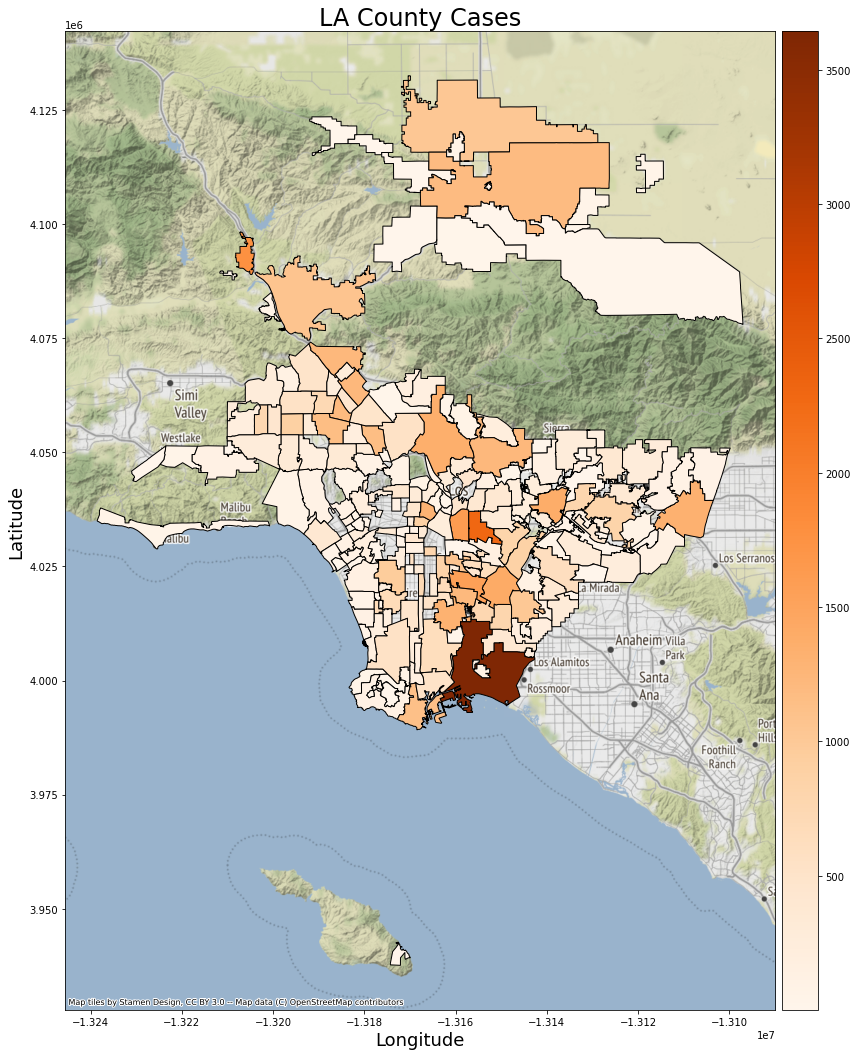

In [28]:
test = test.to_crs(epsg=3857)
fig, ax = plt.subplots(1, 1,figsize=(14,18))
plt.title('LA County Cases',fontsize=24)
plt.xlabel('Longitude',fontsize=18)
plt.ylabel('Latitude',fontsize=18)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
test.plot(column='confirmed_cases', ax=ax, legend=True, cax=cax, cmap='Oranges',edgecolor='black')
ctx.add_basemap(ax)
#plt.savefig('../images/la_county_cases.png',dpi=235,bbox_inches='tight');

#### Read in census data 

In [99]:
census = pd.read_csv('datasets/la_census_2010.csv')
for i in census.index:
    census['NC_Name'][i] = census['NC_Name'][i][:-3].lower()

/Users/Sam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [121]:
la_region = []

for place in current['place']:
    for name in census['NC_Name']:
        if place.lower()==name:
            la_region.append(place.lower())     

In [122]:
la_region

['boyle heights',
 'sylmar',
 'pacoima',
 'panorama city',
 'van nuys',
 'reseda',
 'canoga park',
 'watts',
 'wilmington',
 'lincoln heights',
 'arleta',
 'winnetka',
 'west adams',
 'sherman oaks',
 'tarzana',
 'lake balboa',
 'east hollywood',
 'eagle rock',
 'glassell park',
 'palms',
 'chatsworth',
 'silver lake',
 'mission hills',
 'west hills',
 'encino',
 'harbor city',
 'west los angeles',
 'porter ranch',
 'westwood',
 'mar vista',
 'del rey',
 'studio city',
 'venice',
 'los feliz',
 'atwater village']

In [123]:
def levenshtein_ratio_and_distance(s, t, ratio_calc = False):
    """ levenshtein_ratio_and_distance:
        Calculates levenshtein distance between two strings.
        If ratio_calc = True, the function computes the
        levenshtein distance ratio of similarity between two strings
        For all i and j, distance[i,j] will contain the Levenshtein
        distance between the first i characters of s and the
        first j characters of t
    """
    # Initialize matrix of zeros
    rows = len(s)+1
    cols = len(t)+1
    distance = np.zeros((rows,cols),dtype = int)

    # Populate matrix of zeros with the indeces of each character of both strings
    for i in range(1, rows):
        for k in range(1,cols):
            distance[i][0] = i
            distance[0][k] = k

    # Iterate over the matrix to compute the cost of deletions,insertions and/or substitutions    
    for col in range(1, cols):
        for row in range(1, rows):
            if s[row-1] == t[col-1]:
                cost = 0 # If the characters are the same in the two strings in a given position [i,j] then the cost is 0
            else:
                # In order to align the results with those of the Python Levenshtein package, if we choose to calculate the ratio
                # the cost of a substitution is 2. If we calculate just distance, then the cost of a substitution is 1.
                if ratio_calc == True:
                    cost = 2
                else:
                    cost = 1
            distance[row][col] = min(distance[row-1][col] + 1,      # Cost of deletions
                                 distance[row][col-1] + 1,          # Cost of insertions
                                 distance[row-1][col-1] + cost)     # Cost of substitutions
    if ratio_calc == True:
        # Computation of the Levenshtein Distance Ratio
        Ratio = ((len(s)+len(t)) - distance[row][col]) / (len(s)+len(t))
        return Ratio
    else:
        # print(distance) # Uncomment if you want to see the matrix showing how the algorithm computes the cost of deletions,
        # insertions and/or substitutions
        # This is the minimum number of edits needed to convert string a to string b
        return "The strings are {} edits away".format(distance[row][col])

In [154]:
def string_matcher(str1,str2):
    if len(str2) > len(str1):
        long = str2
        short = str1
    else:
        ratio = levenshtein_ratio_and_distance(str1,str2,ratio_calc = True)
        if ratio > 0.9:
            return 1
        else:
            return 0
    
    for i in range(len(long)-len(short)):
        ratio = levenshtein_ratio_and_distance(short,long[i:i+len(short)],ratio_calc = True)
        if ratio > 0.9:
            return 1
        
    return 0

In [172]:
census_region = []
la_regions = []
la_census = []

for place in current['place']:
    for name in census['NC_Name']:
        if string_matcher(place.lower(),name.lower()) == 1:
            census_region.append(place.lower() + ': ' + name)
            la_regions.append(place)
            la_census.append(name)
census_region

['east los angeles: west los angeles',
 'boyle heights: boyle heights',
 'westlake: westlake north',
 'westlake: westlake south',
 'sylmar: sylmar',
 'pacoima: pacoima',
 'panorama city: panorama city',
 'van nuys: van nuys',
 'north hollywood: mid-town north hollywood',
 'north hollywood: north hollywood northeast',
 'central: central alameda',
 'central: central hollywood',
 'central: central san pedro',
 'central: empowerment congress central area ',
 'reseda: reseda',
 'canoga park: canoga park',
 'north hills: north hills e',
 'north hills: north hills west',
 'watts: watts',
 'northridge: northridge e',
 'northridge: northridge south',
 'northridge: northridge w',
 'wilmington: wilmington',
 'granada hills: granada hills north',
 'granada hills: granada hills south',
 'sun valley: sun valley area',
 'lincoln heights: lincoln heights',
 'arleta: arleta',
 'winnetka: winnetka',
 'highland park: historic highland park',
 'wilshire center: wilshire center - koreatown',
 'hollywood: h

In [173]:
la_regions = set(la_regions)

In [180]:
la_county = la_county.fillna(0)

la_region_cases = {}

for region in la_regions:
    la_region_cases[region] = la_county[la_county['place'] == region]['confirmed_cases'].values

In [181]:
la_region_cases

{'Sun Valley': array([487, 480, 471, 465, 460, 450, 442, 436, 423, 415, 410, 402, 399,
        391, 389, 384, 379, 369, 364, 362, 358, 343, 341, 337, 337, 332,
        324, 319, 306, 301, 293, 286, 275, 271, 262, 258, 250, 246, 241,
        241, 236, 234, 228, 215, 215, 207, 198, 193, 189, 189, 184, 181,
        178, 165, 146, 143, 138, 135, 115, 115, 107, 102,  91,  91,  89,
         83,  77,  70,  61,  55,  53,  48,  48,  46,  39,  34,  32,  29,
         28,  26,  26,  23,  22,  18,  13,  11,  10,   9,   8,   6,   6,
          5,   3,   2,   2,   2,   2,   1,   1]),
 'Winnetka': array([447, 441, 433, 427, 423, 411, 402, 396, 389, 381, 374, 372, 370,
        369, 367, 361, 356, 352, 345, 337, 330, 330, 328, 327, 325, 318,
        309, 301, 295, 286, 283, 282, 276, 271, 267, 266, 256, 253, 240,
        240, 240, 238, 230, 220, 220, 219, 213, 210, 205, 205, 199, 199,
        195, 189, 178, 175, 165, 163, 148, 148, 135, 129, 119, 118, 114,
        104,  95,  84,  73,  67,  67,  62,  58, 